# Reddit Data

In [2]:
import praw    
import datetime
import pandas as pd
import os
import json

try:
    import tokens_Reddit
except:
    print("File token not found in folder! Create file including CLIENT_ID and SECRET for Reddit API!")
    
try:
    import pw_Reddit
except:
    print("File pw not found in folder! Create file including Username and Password for Reddit!")

In [3]:
reddit = praw.Reddit(client_id = tokens_Reddit.CLIENT_ID,
                     client_secret = tokens_Reddit.SECRET,
                     username = pw_Reddit.username,
                     password = pw_Reddit.password,
                     user_agent = "Crypto_Analysis")

In [4]:
# Define keywords
keywords = [
    "Donald Trump", "Joe Biden", "Ron DeSantis", "Robert F. Kennedy Jr.", "Nikki Haley", "Trump","trump"
    "Kamala Harris", "Vivek Ramaswamy", "Presidential debates", "Swing states",
    "Electoral college", "Voter turnout", "Early voting", "Mail-in ballots",
    "Primary elections", "Economy", "Healthcare reform", "Climate policy", "Gun rights",
    "Abortion laws", "Immigration policy", "Student loan forgiveness", "Indictments",
    "Hunter Biden", "January 6th", "Inflation", "Ukraine aid", "Border security", "Gas prices"
]

# directory to store the JSON files (if it doesn't exist)
if not os.path.exists("json_files_Reddit"):
    os.makedirs("json_files_Reddit")

# Initialize a dictionary to store the data
data = {}

def get_subreddit_data(reddit_instance, keywords, days=365):
    # Get the current timestamp
    current_time = datetime.datetime.utcnow()
    start_time = current_time - datetime.timedelta(days=days)
    start_epoch = int(start_time.timestamp())

    # Search for each keyword
    for keyword in keywords:
        print(f"Searching for keyword: {keyword}")
        if keyword not in data:
            data[keyword] = []
        for submission in reddit_instance.subreddit("politics").search(
            query=keyword,
            sort="hot",
            time_filter="year",
        ):
            # Check if the submission is within the last year
            submission_created = datetime.datetime.utcfromtimestamp(submission.created_utc)
            if submission_created >= start_time:
                data[keyword].append({
                    "Title": submission.title,
                    "Score": submission.score,
                    "URL": submission.url,
                    "Created_UTC": submission.created_utc
                })

get_subreddit_data(reddit, keywords)

#save json
for keyword, posts in data.items():
    file_path = os.path.join("json_files_Reddit", f"{keyword.replace(' ', '_')}.json")
    
    with open(file_path, "w") as f:
        json.dump({keyword: posts}, f, indent=4)

print("Data saved to JSON files!")


/tmp/ipykernel_1764/2081351100.py:20: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  current_time = datetime.datetime.utcnow()


Searching for keyword: Donald Trump


/tmp/ipykernel_1764/2081351100.py:35: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  submission_created = datetime.datetime.utcfromtimestamp(submission.created_utc)


Searching for keyword: Joe Biden
Searching for keyword: Ron DeSantis
Searching for keyword: Robert F. Kennedy Jr.
Searching for keyword: Nikki Haley
Searching for keyword: Trump
Searching for keyword: trumpKamala Harris
Searching for keyword: Vivek Ramaswamy
Searching for keyword: Presidential debates
Searching for keyword: Swing states
Searching for keyword: Electoral college
Searching for keyword: Voter turnout
Searching for keyword: Early voting
Searching for keyword: Mail-in ballots
Searching for keyword: Primary elections
Searching for keyword: Economy
Searching for keyword: Healthcare reform
Searching for keyword: Climate policy
Searching for keyword: Gun rights
Searching for keyword: Abortion laws
Searching for keyword: Immigration policy
Searching for keyword: Student loan forgiveness
Searching for keyword: Indictments
Searching for keyword: Hunter Biden
Searching for keyword: January 6th
Searching for keyword: Inflation
Searching for keyword: Ukraine aid
Searching for keyword:

In [5]:
import os
directory = './json_files_Reddit'
 
li = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        df = pd.read_json(f)
        
df

,Nikki Haley
0,{'Title': 'Nikki Haley Takes a Stand Against T...
1,{'Title': 'Trump rules out jobs for Mike Pompe...
2,{'Title': 'Donald Trump Says He Won’t Invite N...
3,{'Title': 'Trump announces former WH officials...
4,{'Title': 'A Final Plea To Nikki Haley Voters'...
...,...
95,{'Title': 'The big question for Nikki Haley is...
96,{'Title': 'The battle is on for Nikki Haley's ...
97,{'Title': 'Nikki Haley calls for RNC vote on r...
98,{'Title': ''I don't know': Nikki Haley says sh...


In [6]:
import pandas as pd
import json
import glob

# Specify the folder containing the JSON files
path = './json_files_Reddit/*.json'  # Replace with your directory path

# List all JSON files in the folder
files = glob.glob(path)

# List to store all records
all_records = []

# Loop through each JSON file
for file in files:
    with open(file, 'r') as f:
        data = json.load(f)  # Load the JSON file
        
        # Loop through each key (e.g., "Electoral college") in the JSON
        for keyword, records in data.items():
            for record in records:
                # Add the keyword as a new column
                record["Keyword"] = keyword
                all_records.append(record)

# Convert the list of records into a single DataFrame
df = pd.DataFrame(all_records)

df.head()



,Title,Score,URL,Created_UTC,Keyword
0,We are reporters from five newsrooms covering ...,50,https://www.reddit.com/r/politics/comments/1gl...,1.730909e+09,Presidential debates
1,Why we need age limits for presidential candid...,199,https://www.washingtonpost.com/opinions/2024/1...,1.729253e+09,Presidential debates
2,Vice Presidential Debate Draws 39 Million on E...,33,https://www.bloomberg.com/news/articles/2024-1...,1.727898e+09,Presidential debates
3,Fact-checking the vice-presidential debate bet...,107,https://www.washingtonpost.com/politics/2024/1...,1.727874e+09,Presidential debates
4,NPR fact checked the Vance-Walz vice president...,5291,https://www.npr.org/2024/10/02/nx-s1-5135675/j...,1.727872e+09,Presidential debates


In [7]:
df['Created_UTC'] = pd.to_datetime(df['Created_UTC'],unit='s')
df = df.drop(columns=['URL'],axis=1) 
df

,Title,Score,Created_UTC,Keyword
0,We are reporters from five newsrooms covering ...,50,2024-11-06 16:02:59,Presidential debates
1,Why we need age limits for presidential candid...,199,2024-10-18 12:08:40,Presidential debates
2,Vice Presidential Debate Draws 39 Million on E...,33,2024-10-02 19:34:07,Presidential debates
3,Fact-checking the vice-presidential debate bet...,107,2024-10-02 13:01:12,Presidential debates
4,NPR fact checked the Vance-Walz vice president...,5291,2024-10-02 12:24:03,Presidential debates
...,...,...,...,...
2199,The big question for Nikki Haley is what to do...,81,2024-03-02 15:19:23,Nikki Haley
2200,The battle is on for Nikki Haley's supporters ...,26,2024-03-07 16:55:39,Nikki Haley
2201,Nikki Haley calls for RNC vote on resolution b...,5459,2024-02-29 14:49:58,Nikki Haley
2202,'I don't know': Nikki Haley says she has doubt...,1469,2024-03-01 21:13:56,Nikki Haley


Keyword     Abortion laws  Border security  Climate policy  Donald Trump  \
Date                                                                       
2023-12-05            0.0              1.0             0.0           0.0   
2023-12-06            0.0              0.0             0.0           0.0   
2023-12-07            0.0              0.0             0.0           0.0   
2023-12-09            0.0              2.0             0.0           0.0   
2023-12-11            0.0              1.0             0.0           0.0   
...                   ...              ...             ...           ...   
2024-11-28            0.0              0.0             0.0           7.0   
2024-11-29            0.0              0.0             0.0           2.0   
2024-11-30            0.0              0.0             0.0           5.0   
2024-12-01            0.0              0.0             0.0           3.0   
2024-12-02            0.0              0.0             0.0           2.0   

Keyword    

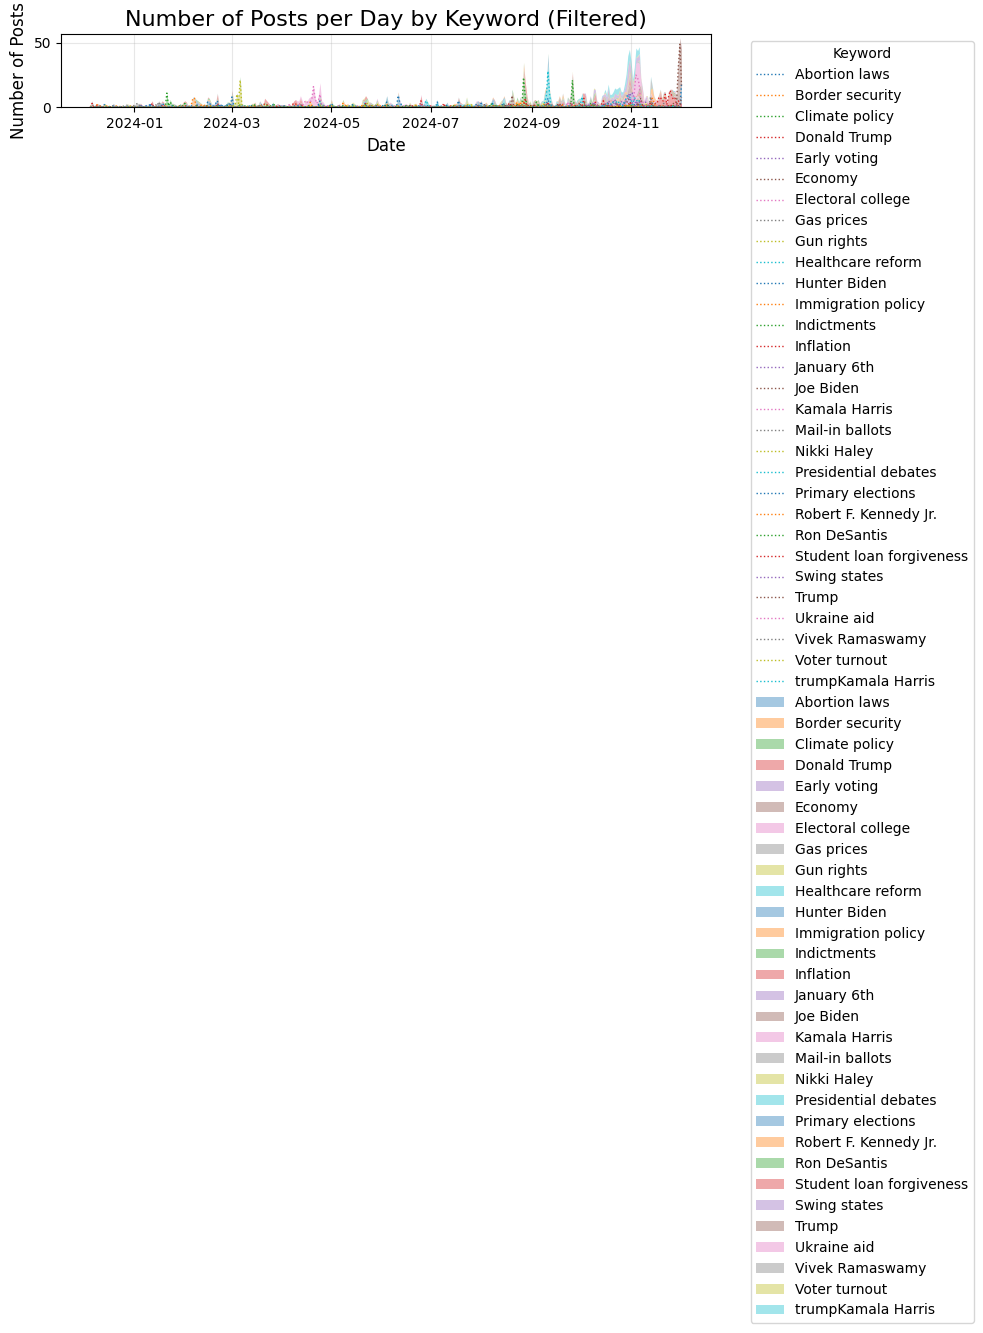

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# Extract date (ignore time) for grouping
df['Date'] = df['Created_UTC'].dt.date

# Group by date and keyword, then count the number of posts
grouped = df.groupby(['Date', 'Keyword']).size().reset_index(name='Post_Count')
filtered_grouped =grouped

# filtered_grouped = grouped[grouped['Post_Count'] > 3]

# Pivot the data for easier plotting
pivot_table = filtered_grouped.pivot(index='Date', columns='Keyword', values='Post_Count').fillna(0)

# Display the pivot table
print(pivot_table)

# Optional: Plot the filtered data
plt.figure(figsize=(10, 8))

# Line plot for filtered keywords over time
pivot_table.plot(ax=plt.gca(), linewidth=1, linestyle="dotted")
pivot_table.plot.area(ax=plt.gca(), alpha=0.4, linewidth=0)
plt.title('Number of Posts per Day by Keyword (Filtered)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


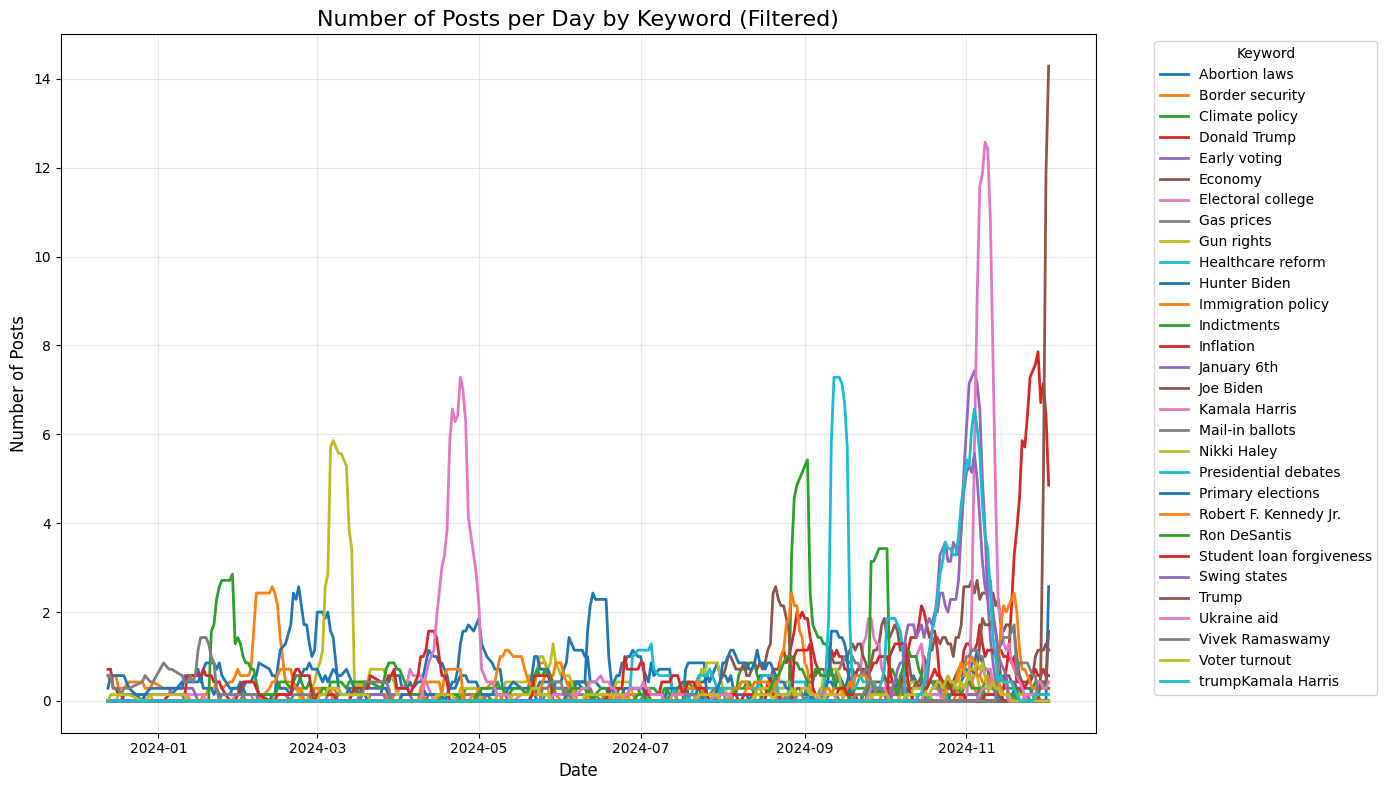

In [9]:
plt.figure(figsize=(14, 8))
pivot_table_rolling = pivot_table.rolling(window=7).mean()
pivot_table_rolling.plot(ax=plt.gca(), linewidth=2)
plt.title('Number of Posts per Day by Keyword (Filtered)', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()

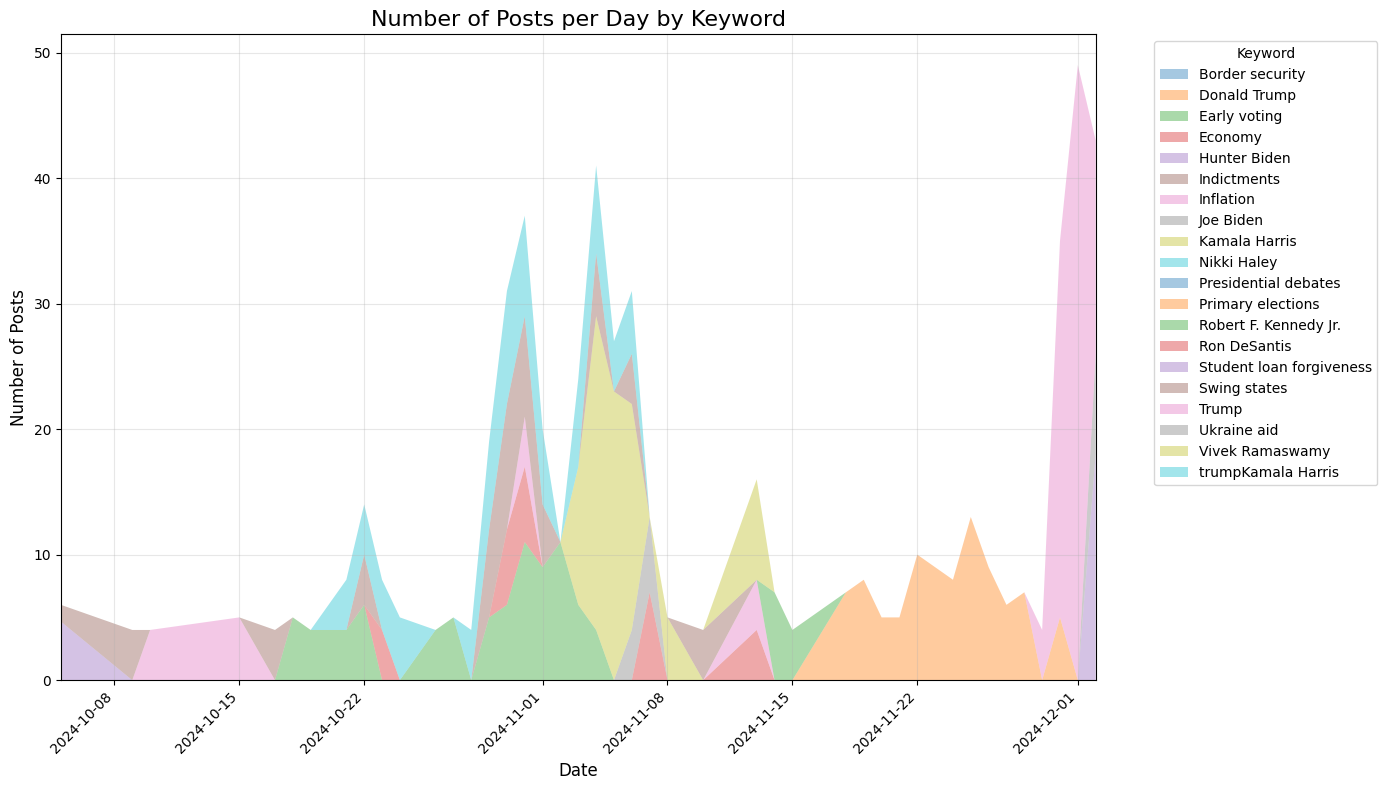

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `df` is your DataFrame
df['Created_UTC'] = pd.to_datetime(df['Created_UTC'])
df['Date'] = df['Created_UTC'].dt.date

# Group by date and keyword, then count the number of posts
grouped = df.groupby(['Date', 'Keyword']).size().reset_index(name='Post_Count')
filtered_grouped = grouped[grouped['Post_Count'] > 3]

# Pivot the data for easier plotting
pivot_table = filtered_grouped.pivot(index='Date', columns='Keyword', values='Post_Count').fillna(0)

# Optionally filter top keywords by total post count
top_keywords = pivot_table.sum(axis=0)[pivot_table.sum(axis=0) > 10].index
pivot_table = pivot_table[top_keywords]

# Plot using a stacked area plot
plt.figure(figsize=(14, 8))
pivot_table.plot.area(ax=plt.gca(), alpha=0.4, linewidth=0)

# Customize plot
plt.title('Number of Posts per Day by Keyword', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Number of Posts', fontsize=12)
plt.legend(title='Keyword', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45, ha="right")  # Rotate date labels
plt.xlim('2024-10-05','2024-12-02')
plt.grid(alpha=0.3)
plt.tight_layout()

# Show the plot
plt.show()


In [18]:
pivot_table

Keyword,Border security,Donald Trump,Early voting,Economy,Hunter Biden,Indictments,Inflation,Joe Biden,Kamala Harris,Nikki Haley,Presidential debates,Primary elections,Robert F. Kennedy Jr.,Ron DeSantis,Student loan forgiveness,Swing states,Trump,Ukraine aid,Vivek Ramaswamy,trumpKamala Harris
Date,,,,,,,,,,,,,,,,,,,,
2024-01-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0
2024-01-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02-06,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-02-07,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-28,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2024-11-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
2024-11-30,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0


In [ ]:
import plotly.express as px
fig = px.line(pivot_table, x='Date', y='Post_Count', title='Interactive Bitcoin Price Trend')
fig.update_layout(xaxis_range=["2024-10-07", "2024-12-02"])

# Show the plot
fig.show()

ValueError: Value of 'x' is not the name of a column in 'data_frame'. Expected one of ['Border security', 'Donald Trump', 'Early voting', 'Economy', 'Hunter Biden', 'Indictments', 'Inflation', 'Joe Biden', 'Kamala Harris', 'Nikki Haley', 'Presidential debates', 'Primary elections', 'Robert F. Kennedy Jr.', 'Ron DeSantis', 'Student loan forgiveness', 'Swing states', 'Trump', 'Ukraine aid', 'Vivek Ramaswamy', 'trumpKamala Harris'] but received: Date